# Import the librairies

In [431]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import folium
import itertools
import tqdm
from tqdm import tqdm

import sklearn
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Retrieve the Data

### Density of each district of Paris

In [74]:
density_data = pd.read_excel("Paris_Density.xlsx")

In [76]:
density_data

,District of Paris,Population,Area (hectares),Density(resident/hectare)
0,Paris 1st District,16 252,183,88.80
1,Paris 2nd District,20 260,99,204.60
2,Paris 3rd District,34 788,117,297.30
3,Paris 4th District,27 487,160,171.80
4,Paris 5th District,59 108,254,232.70
5,Paris 6th District,40 916,215,190.30
6,Paris 7th District,52 512,409,128.40
7,Paris 8th District,36 453,388,93.90
8,Paris 9th District,59 629,218,273.50
9,Paris 10th District,91 932,289,318.10


### Number of pizzerias (500m)

In [605]:
CLIENT_ID = 'ED3UG4F11ZU24PX135IA0HSH4AHWEHCKBHDKBINPRJV4DRH0'
CLIENT_SECRET = '4ZCTZJ1RIOHKKJOKZYNLKNIPI14EJYVNRQXHVCINISFIXWEB'
VERSION = "20180605"
PIZZA = '4bf58dd8d48988d1ca941735'

In [28]:
# First let's create a dataframe with all location

latitudes = np.linspace(48.816970, 48.901075, 46)
longitudes = np.linspace(2.259830, 2.415320, 57)

latlng = list(itertools.product(latitudes, longitudes))

coordinate_data = pd.DataFrame()
latitudes = [i[0] for i in latlng]
longitudes = [i[1] for i in latlng]

coordinate_data["Latitudes"] = latitudes
coordinate_data["Longitudes"] = longitudes

In [45]:
number_of_pizzerias = []
for lat, lng in tqdm(zip(coordinate_data["Latitudes"], coordinate_data["Longitudes"])):
    url = f'''https://api.foursquare.com/v2/venues/search?client_id={CLIENT_ID}&client_secret=
      {CLIENT_SECRET}&ll={lat},{lng}&v={VERSION}&radius={500}&categoryId={PIZZA}'''
    
    result = requests.get(url).json()
    number_of_pizzerias.append(len(result["response"]["venues"]))
    

2622it [07:24,  5.90it/s]


In [47]:
coordinate_data["Number of Pizzeria 500m"] = number_of_pizzerias

In [4]:
coordinate_data = pd.read_csv("PPP Dataset")

In [5]:
coordinate_data

,Unnamed: 0,Latitudes,Longitudes,Number of Pizzeria
0,0,48.816970,2.259830,3
1,1,48.816970,2.262607,5
2,2,48.816970,2.265383,4
3,3,48.816970,2.268160,4
4,4,48.816970,2.270936,2
...,...,...,...,...
2617,2617,48.901075,2.404214,1
2618,2618,48.901075,2.406990,0
2619,2619,48.901075,2.409767,0
2620,2620,48.901075,2.412543,0


### Other kind of restaurant (300m)

In [59]:
RESTAURANT = '4d4b7105d754a06374d81259'

In [60]:
number_of_restaurant = []
for lat, lng in tqdm(zip(coordinate_data["Latitudes"], coordinate_data["Longitudes"])):
    url = f'''https://api.foursquare.com/v2/venues/search?client_id={CLIENT_ID}&client_secret=
      {CLIENT_SECRET}&ll={lat},{lng}&v={VERSION}&radius={300}&categoryId={RESTAURANT}'''
    
    result = requests.get(url).json()
    
    try:
        number_of_restaurant.append(len(result["response"]["venues"]))
    except:
        number_of_restaurant.append(0)
    
    

2622it [09:13,  4.74it/s]


In [62]:
coordinate_data["Number of restaurant"] = number_of_restaurant

In [7]:
coordinate_data

,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant
0,48.816970,2.259830,3,15
1,48.816970,2.262607,5,8
2,48.816970,2.265383,4,7
3,48.816970,2.268160,4,8
4,48.816970,2.270936,2,10
...,...,...,...,...
2617,48.901075,2.404214,1,1
2618,48.901075,2.406990,0,5
2619,48.901075,2.409767,0,5
2620,48.901075,2.412543,0,4


### Price by square metter

In [78]:
price_data = pd.read_excel("Paris_Price.xlsx")

In [79]:
price_data

,District of Paris,Price per square meter
0,Paris 1st District,13312€/m2
1,Paris 2nd District,12 268 €/m2
2,Paris 3rd District,13 351 €/m2
3,Paris 4th District,13 158 €/m2
4,Paris 5th District,13 059 €/m2
5,Paris 6th District,15 617 €/m2
6,Paris 7th District,13 442 €/m2
7,Paris 8th District,12 809 €/m2
8,Paris 9th District,11 702 €/m2
9,Paris 10th District,10 368 €/m2


### Precense of stores (300m)

In [12]:
STORES = "4d4b7105d754a06378d81259"

In [14]:
number_of_stores = []
for lat, lng in tqdm(zip(coordinate_data["Latitudes"], coordinate_data["Longitudes"])):
    url = f'''https://api.foursquare.com/v2/venues/search?client_id={CLIENT_ID}&client_secret=
      {CLIENT_SECRET}&ll={lat},{lng}&v={VERSION}&radius={300}&categoryId={STORES}'''
    
    result = requests.get(url).json()
    
    try:
        number_of_stores.append(len(result["response"]["venues"]))
    except:
        number_of_stores.append(0)
    
    

2622it [08:35,  5.08it/s]


In [17]:
coordinate_data["Number of Stores"] = number_of_stores

In [18]:
coordinate_data

,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant,Number of Stores
0,48.816970,2.259830,3,15,11
1,48.816970,2.262607,5,8,10
2,48.816970,2.265383,4,7,10
3,48.816970,2.268160,4,8,12
4,48.816970,2.270936,2,10,14
...,...,...,...,...,...
2617,48.901075,2.404214,1,1,2
2618,48.901075,2.406990,0,5,3
2619,48.901075,2.409767,0,5,1
2620,48.901075,2.412543,0,4,1


### Precense of tourist places (1km)

In [53]:
TOURIST_PLACES = '''4bf58dd8d48988d12d941735'''

In [54]:
number_of_tourist_places = []
for lat, lng in tqdm(zip(coordinate_data["Latitudes"], coordinate_data["Longitudes"])):
    url = f'''https://api.foursquare.com/v2/venues/search?client_id={CLIENT_ID}&client_secret=
      {CLIENT_SECRET}&ll={lat},{lng}&v={VERSION}&radius={1000}&categoryId={TOURIST_PLACES}'''
    
    result = requests.get(url).json()
    
    try:
        number_of_tourist_places.append(len(result["response"]["venues"]))
    except:
        number_of_tourist_places.append(0)
    
    

2622it [07:25,  5.88it/s]


In [56]:
coordinate_data["Number of Tourists places"] = number_of_tourist_places

### Add the density and the price per square meter to each location 

#### Let's retrieve the district of each location

In [62]:
PostalCode = []
for lat, lng in tqdm(zip(coordinate_data["Latitudes"], coordinate_data["Longitudes"])):
    url = f'''https://api.foursquare.com/v2/venues/search?client_id={CLIENT_ID}&client_secret=
      {CLIENT_SECRET}&ll={lat},{lng}&v={VERSION}&radius={200}&limit={5}'''
    
    result = requests.get(url).json()
    
    for i in range(5):
        try:
            PostalCode.append(result["response"]["venues"][i]["location"]["postalCode"])
            break
        except:
            if i==4:
                PostalCode.append("UNDEFINED")
    

2622it [08:27,  5.16it/s]


In [64]:
coordinate_data["Postal Code"] = PostalCode

In [65]:
District = []
for count, i in enumerate(PostalCode):
    
    if i.startswith("75") and len(i)>3:
        District.append(f"{i[-2:]}th distritct of Paris")
    else:
        District.append("NOT PARIS")

In [66]:
coordinate_data["District"] = District

In [68]:
coordinate_data.drop(columns=["Unnamed: 0"])

,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant,Number of Stores,Number of Tourists places,Postal Code,District
0,48.816970,2.259830,3,15,11,1,92130,NOT PARIS
1,48.816970,2.262607,5,8,10,0,92130,NOT PARIS
2,48.816970,2.265383,4,7,10,0,92130,NOT PARIS
3,48.816970,2.268160,4,8,12,0,92130,NOT PARIS
4,48.816970,2.270936,2,10,14,0,92130,NOT PARIS
...,...,...,...,...,...,...,...,...
2617,48.901075,2.404214,1,1,2,0,75019,19th distritct of Paris
2618,48.901075,2.406990,0,5,3,0,93500,NOT PARIS
2619,48.901075,2.409767,0,5,1,0,93500,NOT PARIS
2620,48.901075,2.412543,0,4,1,0,93500,NOT PARIS


#### Let's drop the non paris location

In [69]:
coordinate_data = coordinate_data.loc[coordinate_data["District"] != 'NOT PARIS']

In [72]:
coordinate_data.drop(columns=["Unnamed: 0"])

,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant,Number of Stores,Number of Tourists places,Postal Code,District
27,48.816970,2.334798,3,12,14,5,75014,14th distritct of Paris
28,48.816970,2.337575,3,18,13,4,75014,14th distritct of Paris
29,48.816970,2.340352,3,21,18,3,75014,14th distritct of Paris
30,48.816970,2.343128,4,26,13,2,75014,14th distritct of Paris
31,48.816970,2.345905,4,22,14,2,75013,13th distritct of Paris
...,...,...,...,...,...,...,...,...
2608,48.901075,2.379224,2,28,28,1,75019,19th distritct of Paris
2610,48.901075,2.384777,2,8,5,1,75019,19th distritct of Paris
2611,48.901075,2.387554,2,16,9,1,75019,19th distritct of Paris
2612,48.901075,2.390331,2,24,13,1,75019,19th distritct of Paris


#### Finally let's add the density and the price by square metter for ecah district 

In [80]:
Price = price_data[['Price per square meter ']]
Density = list(density_data['Density(resident/hectare)'])

Price["Price per square meter "] = Price["Price per square meter "].apply(lambda x: x[:-3])
Price["Price per square meter "] = Price["Price per square meter "].apply(lambda x: x.replace(u'\xa0', ''))
Price["Price per square meter "] = Price["Price per square meter "].apply(lambda x: x.replace(' ', ''))
Price["Price per square meter "] = Price["Price per square meter "].apply(lambda x: x.replace('€', ''))

Price = list(Price["Price per square meter "])

C:\Users\jonat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jonat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jonat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [83]:
Price_district = []
for i in coordinate_data["District"]:
    try:
        Price_district.append(Price[int(i[:2]) - 1])
    except:
        Price_district.append("UNDEFINED")

In [84]:
coordinate_data["Price per square metter"] = Price_district

C:\Users\jonat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
Density_District = []
for i in coordinate_data["District"]:
    try:
        Density_District.append(Density[int(i[:2]) - 1])
    except:
        Density_District.append("UNDEFINED")

In [87]:
coordinate_data["Population Density"] = Density_District

C:\Users\jonat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
coordinate_data.drop(columns=["District", "Postal Code"], inplace=True)

C:\Users\jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
coordinate_data.drop(columns=["Unnamed: 0"], inplace=True).reset_index()

,index,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant,Number of Stores,Number of Tourists places,Price per square metter,Population Density
0,27,48.816970,2.334798,3,12,14,5,9940,243.1
1,28,48.816970,2.337575,3,18,13,4,9940,243.1
2,29,48.816970,2.340352,3,21,18,3,9940,243.1
3,30,48.816970,2.343128,4,26,13,2,9940,243.1
4,31,48.816970,2.345905,4,22,14,2,9246,253.9
...,...,...,...,...,...,...,...,...,...
2108,2608,48.901075,2.379224,2,28,28,1,9402,274.5
2109,2610,48.901075,2.384777,2,8,5,1,9402,274.5
2110,2611,48.901075,2.387554,2,16,9,1,9402,274.5
2111,2612,48.901075,2.390331,2,24,13,1,9402,274.5


### Let's Create the training set 

In [92]:
is_valid = []
test = []
for lat, lng in tqdm(zip(coordinate_data["Latitudes"], coordinate_data["Longitudes"])):
    url = f'''https://api.foursquare.com/v2/venues/search?client_id={CLIENT_ID}&client_secret=
      {CLIENT_SECRET}&ll={lat},{lng}&v={VERSION}&radius={200}&categoryId={PIZZA}&limit={1}'''
    
    result = requests.get(url).json()
    try:
        number = len(result["response"]["venues"])
        if number == 1:
            is_valid.append("Training")
        else:
            is_valid.append("Prediction")
    except:
        is_valid.append("UNDEFINED")
    

2113it [05:50,  6.03it/s]


In [96]:
coordinate_data["Set"] = is_valid

C:\Users\jonat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
training_data  = coordinate_data[coordinate_data["Set"] == "Training"]
training_data.drop(columns=["Unnamed: 0"], inplace = True)
training_data.reset_index(drop=True)

C:\Users\jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant,Number of Stores,Number of Tourists places,Price per square metter,Population Density,Set
0,48.816970,2.340352,3,21,18,3,9940,243.1,Training
1,48.816970,2.343128,4,26,13,2,9940,243.1,Training
2,48.816970,2.348681,2,22,15,2,9246,253.9,Training
3,48.816970,2.359788,2,27,26,0,9246,253.9,Training
4,48.818839,2.329245,8,24,25,5,9940,243.1,Training
...,...,...,...,...,...,...,...,...,...
1395,48.899206,2.384777,3,28,9,1,9402,274.5,Training
1396,48.899206,2.387554,3,30,24,1,9402,274.5,Training
1397,48.899206,2.390331,3,22,21,1,9402,274.5,Training
1398,48.901075,2.387554,2,16,9,1,9402,274.5,Training


In [113]:
predicition_data = coordinate_data[coordinate_data["Set"] == "Prediction"]
predicition_data.drop(columns = ["Unnamed: 0"])
predicition_data.reset_index(drop = True)
predicition_data.drop(columns = ["Unnamed: 0"])

,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant,Number of Stores,Number of Tourists places,Price per square metter,Population Density,Set
27,48.816970,2.334798,3,12,14,5,9940,243.1,Prediction
28,48.816970,2.337575,3,18,13,4,9940,243.1,Prediction
31,48.816970,2.345905,4,22,14,2,9246,253.9,Prediction
35,48.816970,2.357011,2,18,19,0,9246,253.9,Prediction
83,48.818839,2.332022,3,23,14,5,9940,243.1,Prediction
...,...,...,...,...,...,...,...,...,...
2606,48.901075,2.373671,3,29,23,0,9402,274.5,Prediction
2607,48.901075,2.376447,3,28,26,0,9402,274.5,Prediction
2608,48.901075,2.379224,2,28,28,1,9402,274.5,Prediction
2610,48.901075,2.384777,2,8,5,1,9402,274.5,Prediction


In [115]:
coordinate_data.drop(columns = ["Unnamed: 0"], inplace=True)
coordinate_data.reset_index(drop=True)

C:\Users\jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant,Number of Stores,Number of Tourists places,Price per square metter,Population Density,Set
0,48.816970,2.334798,3,12,14,5,9940,243.1,Prediction
1,48.816970,2.337575,3,18,13,4,9940,243.1,Prediction
2,48.816970,2.340352,3,21,18,3,9940,243.1,Training
3,48.816970,2.343128,4,26,13,2,9940,243.1,Training
4,48.816970,2.345905,4,22,14,2,9246,253.9,Prediction
...,...,...,...,...,...,...,...,...,...
2108,48.901075,2.379224,2,28,28,1,9402,274.5,Prediction
2109,48.901075,2.384777,2,8,5,1,9402,274.5,Prediction
2110,48.901075,2.387554,2,16,9,1,9402,274.5,Training
2111,48.901075,2.390331,2,24,13,1,9402,274.5,Training


In [117]:
predicition_data.drop(columns = ["Unnamed: 0"], inplace=True)
predicition_data.reset_index(drop=True)

C:\Users\jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant,Number of Stores,Number of Tourists places,Price per square metter,Population Density,Set
0,48.816970,2.334798,3,12,14,5,9940,243.1,Prediction
1,48.816970,2.337575,3,18,13,4,9940,243.1,Prediction
2,48.816970,2.345905,4,22,14,2,9246,253.9,Prediction
3,48.816970,2.357011,2,18,19,0,9246,253.9,Prediction
4,48.818839,2.332022,3,23,14,5,9940,243.1,Prediction
...,...,...,...,...,...,...,...,...,...
708,48.901075,2.373671,3,29,23,0,9402,274.5,Prediction
709,48.901075,2.376447,3,28,26,0,9402,274.5,Prediction
710,48.901075,2.379224,2,28,28,1,9402,274.5,Prediction
711,48.901075,2.384777,2,8,5,1,9402,274.5,Prediction


In [119]:
training_data.reset_index(drop = True)

,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant,Number of Stores,Number of Tourists places,Price per square metter,Population Density,Set
0,48.816970,2.340352,3,21,18,3,9940,243.1,Training
1,48.816970,2.343128,4,26,13,2,9940,243.1,Training
2,48.816970,2.348681,2,22,15,2,9246,253.9,Training
3,48.816970,2.359788,2,27,26,0,9246,253.9,Training
4,48.818839,2.329245,8,24,25,5,9940,243.1,Training
...,...,...,...,...,...,...,...,...,...
1395,48.899206,2.384777,3,28,9,1,9402,274.5,Training
1396,48.899206,2.387554,3,30,24,1,9402,274.5,Training
1397,48.899206,2.390331,3,22,21,1,9402,274.5,Training
1398,48.901075,2.387554,2,16,9,1,9402,274.5,Training


### Visulazisation of the training neighborhood

In [5]:
maps = folium.Map([48.864716, 2.349014], zoom_start=12, tiles="OpenStreetMap")

for lat, lng in zip(training_data["Latitudes"], training_data["Longitudes"]):
    folium.CircleMarker(popup="Training Point",
                       color = 'red',
                       location = [lat, lng],
                       radius = 1).add_to(maps)
    
for lat, lng in zip(predicition_data["Latitudes"], predicition_data["Longitudes"]):
    folium.CircleMarker(popup="Prediction Point",
                       color = 'blue',
                       location = [lat, lng],
                       radius = 1).add_to(maps)
    

In [50]:
maps

### Calculate the score for each location of the training set 

#### Score = number of ratings  (This score is a really bad variable but it's the best I can have for this capstone, if it was a real project, I would use the checkinsCount metrics of the foursquare but I have not acess to premium calls)

In [633]:
training_data = pd.read_csv("Training.csv")
predicition_data = pd.read_csv("Predictions.csv")
coordinate_data = pd.read_csv("Coordinate.csv")

In [579]:
url = f'''https://api.foursquare.com/v2/search/?client_id={CLIENT_ID}&client_secret=
      {CLIENT_SECRET}&v={VERSION}'''

In [595]:
ids = []
for i, j in tqdm(zip(training_data["Latitudes"], training_data["Longitudes"])):
    
    url = f'''https://api.foursquare.com/v2/venues/search?client_id={CLIENT_ID}&client_secret=
    {CLIENT_SECRET}&ll={i},{j}&v={VERSION}&radius={200}&categoryId={PIZZA}&limit={1}'''
    result = requests.get(url).json()
    try:
        ids.append(result["response"]['venues'][0]["id"])
    except:
        ids.append(0)

1400it [04:08,  5.64it/s]


In [610]:
likes = []

for i in tqdm(ids):
    
    url = f'''https://api.foursquare.com/v2/venues/{i}/likes?client_id={CLIENT_ID}&client_secret=
    {CLIENT_SECRET}&v={VERSION}'''
    
    result = requests.get(url).json()
    
    try:
        likes.append(result["response"]["likes"]["count"])
        
    except:
        likes.append('ERROR')

100%|██████████| 1400/1400 [04:23<00:00,  5.31it/s]


In [621]:
url = f'''https://api.foursquare.com/v2/venues/557c304f498e860f842a8816/likes?client_id={CLIENT_ID}&client_secret=
{CLIENT_SECRET}&v={VERSION}'''

result = requests.get(url).json()

In [634]:
training_data["Score"] = likes

## Data Cleaning

#### Drop non correlated variables 

In [635]:
dataset = training_data.drop(columns=["Unnamed: 0", "Set", "Latitudes", "Longitudes", "Latitudes"])

<AxesSubplot:>

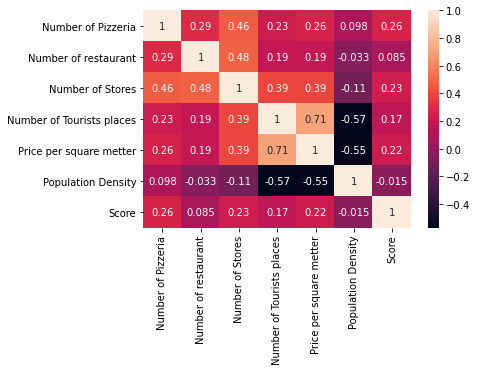

In [636]:
sns.heatmap(dataset.corr(), annot=True)

<h4> We can see that the population density has a very poor correlation with our Score </h4>

In [637]:
dataset.drop(columns=["Population Density"], inplace= True)
predicition_data.drop(columns=["Population Density"], inplace=True)

#### Deal with outiliers values

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Score'>

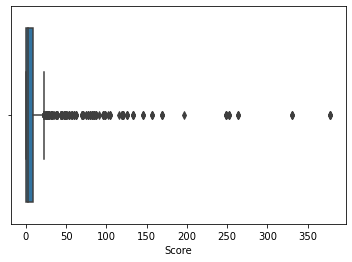

In [638]:
sns.boxplot(dataset["Score"])

In [639]:
score = []
for i in dataset["Score"]:
    if i < 100:
        score.append(i)
    else:
        score.append(dataset["Score"].mean())

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

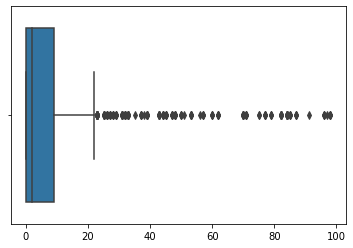

In [640]:
sns.boxplot(score)

In [641]:
dataset["Score"] = score

## Creation of the model

#### Let's split the dataset between the training and the testing set

In [642]:
dataset

,Number of Pizzeria,Number of restaurant,Number of Stores,Number of Tourists places,Price per square metter,Score
0,3,21,18,3,9940,1.0
1,4,26,13,2,9940,1.0
2,2,22,15,2,9246,0.0
3,2,27,26,0,9246,0.0
4,8,24,25,5,9940,7.0
...,...,...,...,...,...,...
1395,3,28,9,1,9402,1.0
1396,3,30,24,1,9402,1.0
1397,3,22,21,1,9402,0.0
1398,2,16,9,1,9402,1.0


In [648]:
train, test = train_test_split(dataset, test_size = 0.1)

In [649]:
x_train = train[["Number of Pizzeria", "Number of restaurant", "Number of Stores", "Number of Tourists places", "Price per square metter"]]
y_train = train[["Score"]]
x_test = test[["Number of Pizzeria", "Number of restaurant", "Number of Stores", "Number of Tourists places", "Price per square metter"]]
y_test = test[["Score"]]

In [650]:
valeurs = []
for i in range(1, 5):
    
    scale = StandardScaler()
    poly = PolynomialFeatures(degree=i)
    x_train = scale.fit_transform(x_train)
    x_test = scale.fit_transform(x_test)
    
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    
    regression = linear_model.LinearRegression()
    regression.fit(x_train_poly, y_train)
    yhat = regression.predict(x_test_poly)
    valeurs.append(regression.score(x_test_poly, y_test))

In [651]:
index = np.array(valeurs).argmax()
index +=1

In [653]:
scale = StandardScaler()
poly = PolynomialFeatures(degree=index)
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)
    
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
    
regression = linear_model.LinearRegression()
regression.fit(x_train_poly, y_train)
yhat = regression.predict(x_test_poly)

## Prediction of the values

In [654]:
predicition_data

,Unnamed: 0,Latitudes,Longitudes,Number of Pizzeria,Number of restaurant,Number of Stores,Number of Tourists places,Price per square metter,Set
0,27,48.816970,2.334798,3,12,14,5,9940,Prediction
1,28,48.816970,2.337575,3,18,13,4,9940,Prediction
2,31,48.816970,2.345905,4,22,14,2,9246,Prediction
3,35,48.816970,2.357011,2,18,19,0,9246,Prediction
4,83,48.818839,2.332022,3,23,14,5,9940,Prediction
...,...,...,...,...,...,...,...,...,...
708,2606,48.901075,2.373671,3,29,23,0,9402,Prediction
709,2607,48.901075,2.376447,3,28,26,0,9402,Prediction
710,2608,48.901075,2.379224,2,28,28,1,9402,Prediction
711,2610,48.901075,2.384777,2,8,5,1,9402,Prediction


In [655]:
threesold = training_data["Score"].quantile(0.7)

In [657]:
prediction_data = predicition_data[["Number of Pizzeria", "Number of restaurant", "Number of Stores", "Number of Tourists places", "Price per square metter"]]

In [662]:
prediction_dataset = predicition_data.drop(columns=["Unnamed: 0", "Set", "Longitudes", "Latitudes"])

In [672]:
prediction_dataset = predicition_dataset[predicition_dataset["Price per square metter"] != 'UNDEFINED']

In [675]:
prediction = scale.fit_transform(prediction_dataset)
prediction = poly.fit_transform(prediction)
prediction_final = regression.predict(prediction)

In [676]:
classification = []
for i in prediction_final:
    if i > threesold:
        classification.append("YES")
    else:
        classification.append("NO")

In [679]:
predicition_data = predicition_data[predicition_data["Price per square metter"] != "UNDEFINED"]

In [680]:
predicition_data["Class"] = classification

C:\Users\jonat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [682]:
predicition_data_final = predicition_data.drop(columns=["Unnamed: 0"])

In [696]:
maps = folium.Map([48.864716, 2.349014], zoom_start=12, tiles="OpenStreetMap")

for lat, lng, clas in zip(predicition_data_final["Latitudes"], predicition_data_final["Longitudes"], predicition_data_final["Class"]):
    
    if clas == 'YES':
        folium.CircleMarker(popup="GOOD EMPLACEMENT",
                           color = 'blue',
                           fill_color = "blue",
                           location = [lat, lng],
                           radius = 1.5).add_to(maps)

In [697]:
maps